First were importing the needed libraries and the dataset for this project.

In [1]:
import pandas as pd

Next were importing the dataset and concatenating the mutiple dataframes into one, I had some problems doing this Mr. MK came in clucht and helped me out with this boilerplate code.


In [2]:
with open('./CUB_200_2011/CUB_200_2011/attributes/image_attribute_labels.txt', 'r') as file:
    lines = [line.strip().split()[:3] for line in file]

main_dataset = pd.DataFrame(lines, columns=['imgid', 'attid', 'present']).astype(int)

Next were going to clean the dataset, this is neccesarly because we want the have a clean dataset to work with. This improves the accuracy and relatability of the model were going to build.

First were checking if the dataset contains null values, if so were going to drop them. In our case it's returning false for the all the attributes so we don't have to drop any null values. But for the practise we will implement it anyway.

In [3]:
# Just for checking porpuses the data has no any null values
if main_dataset.isnull().any().any():
    print("There are null values in the dataset")
else:
    print("There are no null values in the dataset")

There are no null values in the dataset


Now we need to check if the dataset needs to be converted to numerical data so we can use it in our model.

In [4]:
conv_dataset = pd.get_dummies(main_dataset)

# Just for checking porpuses
display(conv_dataset.head())

,imgid,attid,present
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,1


We make here the train/test split for the model

In [5]:
from sklearn.model_selection import train_test_split

# Stripping the imgid column for accuracy testing 
X = conv_dataset.drop(['present', 'imgid'], axis=1)
# X = conv_dataset.drop(['present'], axis=1)
# The y axis is the classfication of the attributeId
y = conv_dataset['present']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Make the train and test set the X axis and the Y Axis of the dataset to implement the random forest model.

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold



# This will output the cross validation score in an array then we will take the mean of it
clf = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=10)
# clf = RandomForestClassifier(criterion='entropy', n_estimators=1, random_state=42, max_depth=10)
# clf = RandomForestClassifier(criterion='log_loss', n_estimators=1, random_state=42, max_depth=10)

# The number of test sample for the folds are 5
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
 
# This will output the cross validation score in array then we will take the mean of it
scores = cross_val_score(clf, X, y, cv = cv)

# Train the classifier on the training set 
clf.fit(X_train, y_train)
clf.get_params()

# Make predictions on the test set results
y_pred = clf.predict(X_test)
cross_val_precision = cross_val_score(clf, X, y, cv=cv, scoring='precision')


# To get probabilities estimates of the positive class
proba_predictions = clf.predict_proba(X_test)

# This is the classification report from our model
print(proba_predictions[:5]) 
print("Cross-validated Accuracy: %0.2f%% (+/- %0.2f%%)" % (scores.mean() * 100, scores.std() * 200 ), "\n")
print(classification_report(y_test, y_pred, target_names=['Not Present', 'Present']))

[[0.99152328 0.00847672]
 [0.91444694 0.08555306]
 [0.86853425 0.13146575]
 [0.90982    0.09018   ]
 [0.88943952 0.11056048]]
Cross-validated Accuracy: 90.21% (+/- 0.03%) 

              precision    recall  f1-score   support

 Not Present       0.91      0.99      0.95    661436
     Present       0.62      0.08      0.14     74136

    accuracy                           0.90    735572
   macro avg       0.76      0.54      0.54    735572
weighted avg       0.88      0.90      0.87    735572



Now were going to plot the confusion matrix to see how the model is performing.

              precision    recall  f1-score   support

           0       0.91      0.99      0.95    661436
           1       0.62      0.08      0.14     74136

    accuracy                           0.90    735572
   macro avg       0.76      0.54      0.54    735572
weighted avg       0.88      0.90      0.87    735572

              precision    recall  f1-score   support

           0       0.91      0.99      0.95    661436
           1       0.62      0.08      0.14     74136

    accuracy                           0.90    735572
   macro avg       0.76      0.54      0.54    735572
weighted avg       0.88      0.90      0.87    735572

              precision    recall  f1-score   support

           0       0.91      0.99      0.95    661436
           1       0.62      0.08      0.14     74136

    accuracy                           0.90    735572
   macro avg       0.76      0.54      0.54    735572
weighted avg       0.88      0.90      0.87    735572



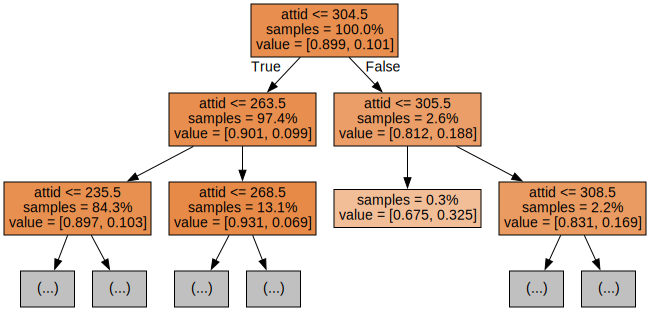

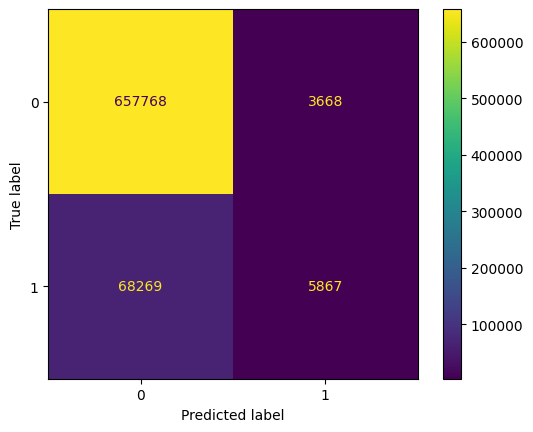

In [7]:
import graphviz
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.tree import export_graphviz

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)

for i in range(3):    
    tree = clf.estimators_[i]
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    print(classification_report(y_test, y_pred))
    dot_data = export_graphviz(tree, feature_names=X_train.columns, filled=True,  max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    
display(graph)
disp.plot()
plt.show()
